# Week4 (Wuwei Zhang)

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

def load_dataset():
    mndata = MNIST('./python-mnist/data/')
    A_train, labels_train = map(np.array, mndata.load_training()) 
    A_test, labels_test = map(np.array, mndata.load_testing()) 
    A_train = A_train/255.0
    A_test = A_test/255.0
    
    return A_train, A_test, labels_train, labels_test

A_train, A_test, labels_train, labels_test = load_dataset()


B_labels_train = np.zeros((60000, 10))
for i in range(len(labels_train)):
    B_labels_train[i, labels_train[i]] = 1
B_labels_test = np.zeros((10000, 10))
for j in range(len(labels_test)):
    B_labels_test[j, labels_test[j]] = 1
    


# Create Binary Classification Dataset   

ind2 = np.where(labels_train == 2)[0]
ind7 = np.where(labels_train ==7)[0]

bin_A_train = np.vstack((A_train[ind2,:], A_train[ind7,:]))
bin_label_train = np.hstack((-1*np.ones(len(ind2)), np.ones(len(ind7))))


ind2_test = np.where(labels_test == 2)[0]
ind7_test = np.where(labels_test ==7)[0]

bin_A_test = np.vstack((A_test[ind2_test,:], A_test[ind7_test,:]))
bin_label_test = np.hstack((-1*np.ones(len(ind2_test)), np.ones(len(ind7_test))))



In [155]:
# %% Minimize J(x,y) using gradient descent

# Define err = $\eta||x_{t+1} - x_t||_2 + \eta|y_{t+1} - y|$

def mu_i(x, y, i):
    return 1/(1 + np.exp((-1)*bin_label_train[i]*(y+bin_A_train[i,]@x)))

def J_grad_x(x, y):
    s = np.zeros(784)
    for i in range(12223):
        s1 = (-1)*bin_label_train[i]*(bin_A_train[i,])*(1-mu_i(x, y, i))
        s = np.add(s, s1)
    return s / 12223 + 0.1 * 2 * x


def J_grad_y(x, y):
    s = 0
    for i in range(12223):
        s1 = (-1)*bin_label_train[i]*(1-mu_i(x, y, i))
        s = np.add(s, s1)
    return s / 12223


def J(x, y):
    s = 0
    for i in range(12223):
        s1 = 1 + np.exp((-1)*bin_label_train[i]*(y+bin_A_train[i,]@x))
        s = s + np.log(s1)
    return s / 12223 + 0.1 * np.square(x).sum()

############################################
####REDEFINE FUNCTIONS WITHOUT FOR LOOPS####
############################################
def mu(x,y):
    return 1/(1 + np.exp(-bin_label_train*(y + bin_A_train@x)))
              

def J_grad_x_vec(x,y):
    n = bin_A_train.shape[0]
    return np.sum(-bin_label_train*bin_A_train.T*(1 - mu(x,y)), axis = 1)/n + 2*0.1*x
    

###TO DO: REDEFINE J_grad_y and J WITHOUT FOR LOOPS #######
    

def grad_descent(xinit, yinit, J_grad_x, J_grad_y, **kwargs):
    tol = kwargs.pop('error', 1e-6)
    step_size = kwargs.pop('step_size', .1)
    
    err = 1
    xold = xinit
    yold = yinit
    
    max_iter = 200
    iter_count = 0
    
    J_value = [J(xold, yold)]
    
    while err > tol:
        xnew = xold - step_size*J_grad_x(xold, yold)
        ynew = yold - step_size*J_grad_y(xnew, yold)
        
        err1 = step_size * np.linalg.norm(xnew - xold,2)
        err2 = step_size * abs(ynew - yold)
        
        err = err1 + err2
                        
        J_value.append(J(xnew, ynew))
        
        #####################################################################################
        ##CALCULATE PREDICTED LABELS EACH ITERATION AND KEEP TRACK OF TRAIN AND TEST ERROR ##
        #####################################################################################
        #pred_labels_train = 
        #pred_labels_test = 
        
        #misclassification_error_train.append() 
        #misclassification_error_test.append()

        
        ##### YOU FORGOT TO UPDATE YOUR VARIABLES EACH ITERATION #####
        np.copyto(xold, xnew)
        yold = ynew
        
        iter_count+=1
        print(iter_count)
        if iter_count>=max_iter:
            print('Reached max number of iterations')
            return xnew, ynew, J_value
        
    return xnew, ynew, J_value
        
    
    



In [154]:
xfinal, yfinal, J_value_train = grad_descent(np.zeros(784).T, 0, J_grad_x, J_grad_y, step_size = 10**(-3))




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130


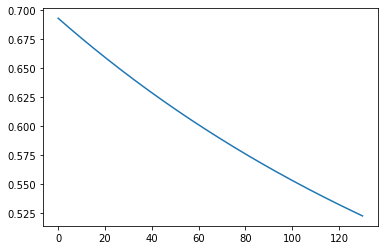

In [156]:
plt.plot(J_value_train)